# The Sparks Foundation - GRIP Mar. 2021
## Author : Mohit Kumar

## Data Science & Business Analytics
### Task 2 - Prediction using Unsupervised ML
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

I am going to use the K-Means Clustering here as it is simple, easy,fast and efficient unsupervised machine learning algorithm. And with the help of K-means clustering we can segments our data efficiently.
* K-means iterates a function whose domain is a finite set , that converges in a finite number of iterations.
* Computational cost of K-means algorithm is O(KxNxD) ,where N is the number of data points ,K is the number of clusters present in your dataset ,and D is the number of attributes.

#### Import Libraries required

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans


In [2]:
#load data into your loacal directory then access it from pandas by making an object instance 

df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Discription of data

In [3]:
# these variables are just for presenting the output in a understanding way.
bold = "\033[1m"
color = "\033[91m"
norm = "\033[0;0m"
print(bold+color+'Shape of data :\n'+norm,df.shape)
print(bold+color+'\nData Types :\n'+norm,df.dtypes)
print(bold+color+'\nAxes of data :\n'+norm,df.axes)



Shape of data :
 (150, 6)

Data Types :
 Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Axes of data :
 [RangeIndex(start=0, stop=150, step=1), Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')]


### Training of model
##### * We then select four columns and store it in X variable for training.

In [4]:
X = df.iloc[:,[0,1,2,3]].values

#####  * First just look the output of K-means clustering for a random value of K , Let's say k=6

In [5]:
kmeans6 = KMeans(n_clusters=6)
Y_kmeans6 = kmeans6.fit_predict(X)
print(Y_kmeans6)
kmeans6.cluster_centers_

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array([[ 89.5       ,   5.84615385,   2.77307692,   4.30384615],
       [ 37.5       ,   4.97692308,   3.35769231,   1.48461538],
       [138.5       ,   6.575     ,   3.0125    ,   5.44166667],
       [ 63.5       ,   6.03461538,   2.78461538,   4.31538462],
       [ 12.5       ,   5.0375    ,   3.48333333,   1.44166667],
       [114.5       ,   6.64583333,   2.93333333,   5.6625    ]])

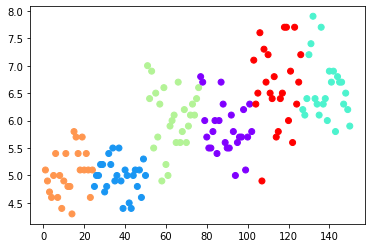

In [6]:
plt.scatter(X[:,0],X[:,1], c=Y_kmeans6 ,cmap ='rainbow')

### Finding the optimum value for the dataset
##### * Now there is a method called elbow method ,which is designed to find out the optimal number of clusters in a dataset. So,let's find out the optimum value of k. 

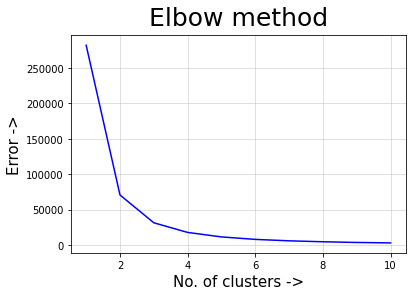

In [7]:
#sse is Sum of Squared Error

sse=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i).fit(X)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(range(1,11),sse,color='blue')
plt.grid(alpha=0.5)
plt.title('Elbow method',size = 25,pad = 10)
plt.xlabel('No. of clusters ->',size = 15)
plt.ylabel('Error ->',size = 15)
plt.show()

##### * In the above elbow diagram it's clearly shown that the optimal value is around between 2 and 4 as elbow like shape is formed perfectly at around k = 3

In [8]:
# now implement k-means clustering  with k=3
kmeans3 = KMeans(n_clusters =3)
Y_kmeans3 = kmeans3.fit_predict(X)
print(Y_kmeans3)

kmeans3.cluster_centers_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


array([[ 25.        ,   5.00612245,   3.42040816,   1.46530612],
       [125.        ,   6.57058824,   2.97058824,   5.52352941],
       [ 74.5       ,   5.922     ,   2.78      ,   4.206     ]])

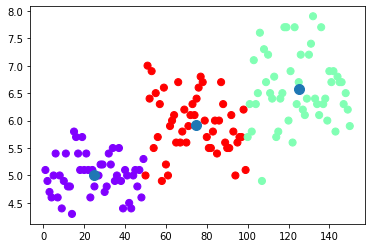

In [9]:
#represents the different species
plt.scatter(X[:,0],X[:,1], c = Y_kmeans3 ,cmap ='rainbow',s =50)
#represents the centroids of the cluster
plt.scatter(kmeans3.cluster_centers_[:,0],kmeans3.cluster_centers_[:,1],s=100)

### Above ,i first found the optimum value for k that is 3 ,means 3 clusters are optimally present in this dataset which i represented in above cell .